## ROSHAN POUDEL HW_4_P2

In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

In [3]:
from torchvision import models

In [4]:
resnet = models.resnet101(pretrained=True)

/Users/roshan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/roshan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# In[6]:
from torchvision import transforms
preprocess = transforms.Compose([
       transforms.Resize(256),
       transforms.CenterCrop(224),
       transforms.ToTensor(),
       transforms.Normalize(
           mean=[0.485, 0.456, 0.406],
           std=[0.229, 0.224, 0.225]
       )])

In [6]:
from PIL import Image

In [7]:
img = Image.open("/Users/roshan/Documents/CS415/Homeworks/Homework_4/gshep.jpg")

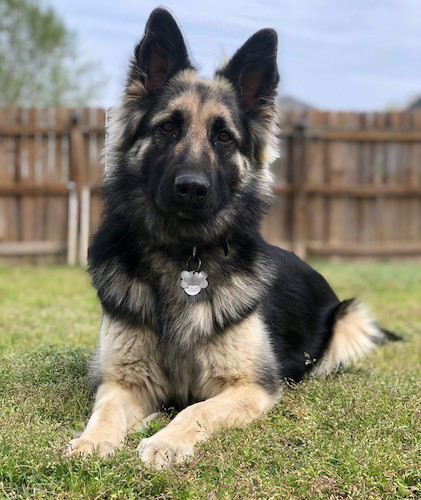

In [8]:
img

In [9]:
# In[9]:
img_t = preprocess(img)

In [10]:
# In[10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out = resnet(batch_t)

In [13]:
with open('/Users/roshan/Documents/CS415/Homeworks/Homework_4/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [14]:
# In[14]:
_, index = torch.max(out, 1)

In [15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('German shepherd, German shepherd dog, German police dog, alsatian',
 99.03958129882812)

In [16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('German shepherd, German shepherd dog, German police dog, alsatian',
  99.03958129882812),
 ('keeshond', 0.2658759355545044),
 ('malinois', 0.1705443114042282),
 ('Leonberg', 0.11683104187250137),
 ('Norwegian elkhound, elkhound', 0.09998723119497299)]

In [17]:
img = Image.open("/Users/roshan/Documents/CS415/Homeworks/Homework_4/md.jpg")

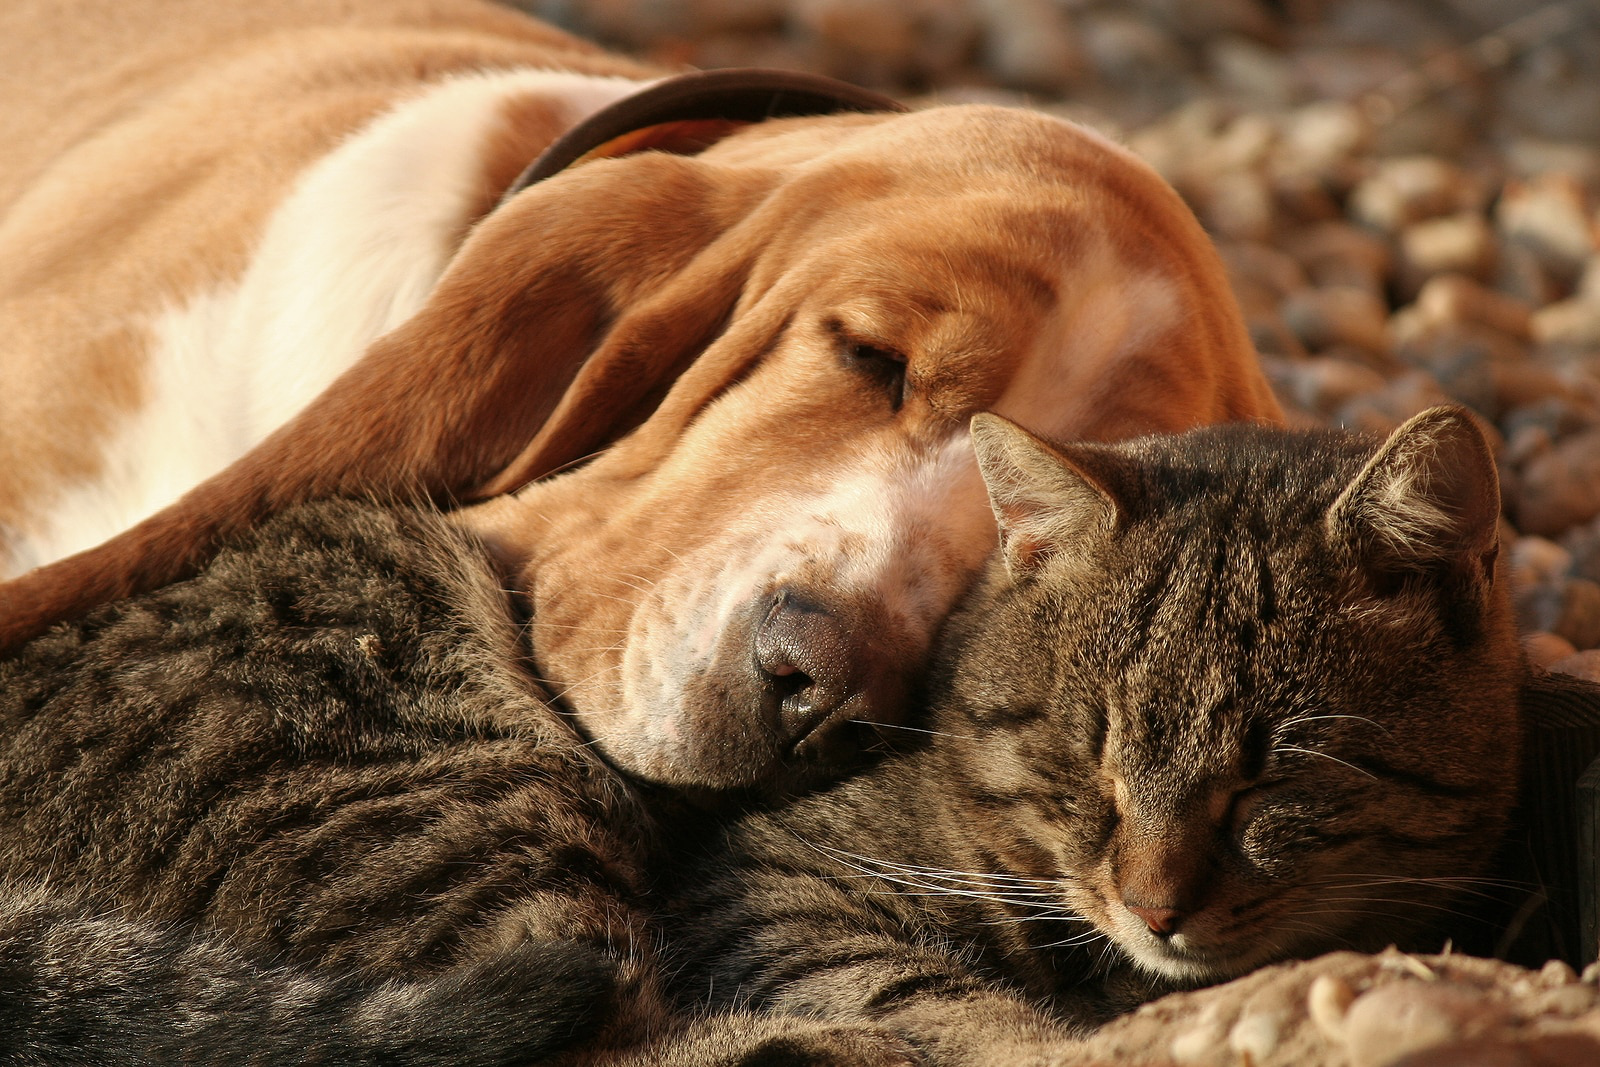

In [18]:
img

In [19]:
img_t = preprocess(img)

In [20]:
batch_t = torch.unsqueeze(img_t, 0)

In [21]:
resnet.eval()
out = resnet(batch_t)

In [22]:
batch_t = torch.unsqueeze(img_t, 0)

In [23]:
_, index = torch.max(out, 1)

In [24]:
index

tensor([161])

In [25]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('basset, basset hound', 29.69495391845703)

In [26]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('basset, basset hound', 29.69495391845703),
 ('tabby, tabby cat', 17.177583694458008),
 ('tiger cat', 16.31608772277832),
 ('bloodhound, sleuthhound', 12.811994552612305),
 ('Egyptian cat', 10.093001365661621)]

In [27]:
 img = Image.open("/Users/roshan/Documents/CS415/Homeworks/Homework_4/img3.jpg")

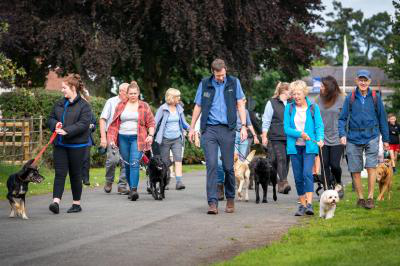

In [28]:
img

In [29]:
img_t = preprocess(img)

In [30]:
batch_t = torch.unsqueeze(img_t, 0)

In [31]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
out = resnet(batch_t)

In [33]:
_, index = torch.max(out, 1)

In [34]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Scottish deerhound, deerhound', 28.988426208496094)

In [35]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Scottish deerhound, deerhound', 28.988426208496094),
 ('standard schnauzer', 7.019402027130127),
 ('giant schnauzer', 5.789425373077393),
 ('Staffordshire bullterrier, Staffordshire bull terrier', 5.770529270172119),
 ('EntleBucher', 5.443009853363037)]